<a href="https://colab.research.google.com/github/Alirs2002/tweet_sentiment_analysis/blob/main/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

in this motherfucker project, i am going to create a model by keras,to classify tweets,to 2 classes

1-disaster

2-normal

lets import necessary libraries

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

now,lets download our dataset

In [2]:
!wget "https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip"

--2023-10-07 17:58:58--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.207, 108.177.98.207, 74.125.197.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.007s  

2023-10-07 17:58:58 (87.2 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



In [3]:
!ls

nlp_getting_started.zip  sample_data


In [4]:
!ls ..

bin			    etc     media		      root  tools
boot			    home    mnt			      run   usr
content			    lib     NGC-DL-CONTAINER-LICENSE  sbin  var
cuda-keyring_1.0-1_all.deb  lib32   opt			      srv
datalab			    lib64   proc		      sys
dev			    libx32  python-apt		      tmp


now,lets create a function to unzip our data

In [5]:
import zipfile

def unzip_data(path):

  zip_file_ref = zipfile.ZipFile(path,"r")

  zip_file_ref.extractall()

  zip_file_ref.close()

In [6]:
zip_file_path = "./nlp_getting_started.zip"

In [7]:
unzip_data(zip_file_path)

In [8]:
!ls

nlp_getting_started.zip  sample_submission.csv	train.csv
sample_data		 test.csv


now,lets import our train and test datasets

In [9]:
train_data_path = "./train.csv"

test_data_path = "./test.csv"

In [10]:
train_data = pd.read_csv(train_data_path)

test_data = pd.read_csv(test_data_path)

In [11]:
train_data

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [12]:
pd.options.display.max_colwidth=200

In [13]:
train_data[:2][["text","target"]]

,text,target
0,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
1,Forest fire near La Ronge Sask. Canada,1


In [14]:
train_data["target"].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [15]:
train_data.tail()

,id,keyword,location,text,target
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse into nearby homes http://t.co/STfMbbZFB5,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control wild fires in California even in the Northern part of the state. Very troubling.,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. http://t.co/zDtoyd8EbJ,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided with a car in Little Portugal. E-bike rider suffered serious non-life threatening injuries.,1
7612,10873,NaN,NaN,The Latest: More Homes Razed by Northern California Wildfire - ABC News http://t.co/YmY4rSkQ3d,1


In [16]:
print(len(train_data))

7613


In [17]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [18]:
pd.options.display.max_dir_items=200

In [19]:
train_data["keyword"].isnull().value_counts()

False    7552
True       61
Name: keyword, dtype: int64

In [20]:
train_data[100:105]

,id,keyword,location,text,target
100,144,accident,UK,.@NorwayMFA #Bahrain police had previously died in a road accident they were not killed by explosion https://t.co/gFJfgTodad,1
101,145,accident,"Nairobi, Kenya",I still have not heard Church Leaders of Kenya coming forward to comment on the accident issue and disciplinary measures#ArrestPastorNganga,0
102,146,aftershock,Instagram - @heyimginog,@afterShock_DeLo scuf ps live and the game... cya,0
103,149,aftershock,304,'The man who can drive himself further once the effort gets painful is the man who will win.' \nRoger Bannister,0
104,151,aftershock,Switzerland,320 [IR] ICEMOON [AFTERSHOCK] | http://t.co/yNXnvVKCDA | @djicemoon | #Dubstep #TrapMusic #DnB #EDM #Dance #IcesÛ_ http://t.co/weQPesENku,0


i think ,location and keyword,doesnt have any influenct on our prediction,so we will remove them from our dataset in future

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
train_data = train_data.sample(frac=1,random_state=85)

In [23]:
train_data

,id,keyword,location,text,target
6039,8633,seismic,"Mogadishu, Somalia",Exploration Takes Seismic Shift in #Gabon to #Somalia\nhttp://t.co/Ltf6jL5keU http://t.co/Zlq8tHcTkW,1
1709,2465,collided,San Francisco,Mind blown by @GlassAnimals slithering viscous Gold Mine (cover of Yeah Yeah Yeahs + Erykah Badu)Û_ http://t.co/7Zb9gm5z0h,0
2775,3992,devastation,NaN,70 Years After Atomic Bombs Japan Still Struggles With War Past: The anniversary of the devastation wrought b... http://t.co/vFCtrzaOk2,1
2511,3607,desolation,"North East, England",Just came back from camping and returned with a new song which gets recorded tomorrow. Can't wait! #Desolation #TheConspiracyTheory #NewEP,1
5234,7480,obliteration,NaN,Dead Space - Obliteration Imminent [2/2]: http://t.co/XJB0dCAaHf via @YouTube,0
...,...,...,...,...,...
7053,10106,typhoon,Dhaka,Obama Declares Disaster for Typhoon-Devastated Saipan: Obama signs disaster declaration for Northern Marians a... http://t.co/lEYJwNnAH8,1
1587,2292,cliff%20fall,"Lagos, Nigeria",Huge cliff landslide on road in China: Watch the moment a cliff collapses as huge chunks of rock fall onto a r... http://t.co/eEEwO207mX,1
5828,8321,rubble,Spain - China - Latin America.,China's Stock Market Crash: Are There Gems In The Rubble?: ChinaÛªs stock market crash this summer h... http://t.co/pE2R3lN16o by .Forbes,0
5280,7545,outbreak,Chile,Families to sue over Legionnaires: More than 40 families affected by the fatal outbreak of Legionnaires' disea... http://t.co/02ELqLOpFk,1


In [24]:
train_sentence,val_sentence,train_labels,val_labels = train_test_split(train_data["text"].to_numpy(),
                                                                       train_data["target"].to_numpy(),
                                                                       test_size=0.1,
                                                                       random_state=85)

In [25]:
len(train_sentence),len(train_labels),len(val_sentence),len(val_labels)

(6851, 6851, 762, 762)

In [26]:
train_sentence

array(['Insane bush fires in California. Be safe. https://t.co/jSlxTQ3NqS',
       '@beckyfeigin I defs will when it stops bleeding!',
       "I don't laugh out loud at many things. But man I really lol @ the big bang theory.",
       ...,
       'Only one man Tsutomi Yamaguchi is said to have survived both atomic bomb blasts at #Hiroshima and #Nagasaki. #OTD http://t.co/DaalPeNZp0',
       'Blue Bell May Be Close to a Return From Its Listeria Disaster... Hot on #theneeds #Recipes http://t.co/F56v61AmPt',
       '9:35 pm. Thunderstorm. No rain. 90 degrees. This weather weird.'],
      dtype=object)

now,we have created our training sentence

In [27]:
import random
def show_random(dataset1,dataset2):

  if(len(dataset1)!=len(dataset2)):
    return "fuck you,your fucking datasets are wrong"

  length = len(dataset1)

  random_num = random.randint(0,length)

  random_text = dataset1[random_num]
  random_label = dataset2[random_num]

  if(random_label ==1):
    random_label = "disaster"
  else:
    random_label = "normal"

  print(f"text: {random_text} \n label :{random_label}")

In [28]:
show_random(train_sentence,train_labels)

text: we'll crash down like an avalanche 
 label :normal


ok,now we should do our next step which is converting our dataset to number

In [29]:
from tensorflow.keras.layers import TextVectorization

In [30]:
vocab_size = 20000

vectorizer = TextVectorization(max_tokens=vocab_size,
                               split="whitespace",
                               standardize="lower_and_strip_punctuation",
                               output_mode="int",
                               output_sequence_length=25)

now,we should adapt our vectorizer

In [31]:
vectorizer.adapt(train_sentence)

In [32]:
vectorizer.vocabulary_size()

20000

In [33]:
len(vectorizer.get_vocabulary())

20000

In [34]:
vectorizer.get_vocabulary()[:10]

['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is']

all right,we have made our vocabulary

lets test it on a simple sentence

In [35]:
simple_sentence = "hello,did you know that zaza pachulia is the greatest player ever?"

simple_matrix = vectorizer(simple_sentence)

simple_matrix

<tf.Tensor: shape=(25,), dtype=int64, numpy=
array([   1,   12,   92,   16,    1,    1,    9,    2, 2090, 2009,  224,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0])>

In [36]:
vectorizer.get_vocabulary()[9999]

'panik'

In [37]:
print(vectorizer("hello"))

tf.Tensor(
[1849    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0], shape=(25,), dtype=int64)


now,lets create a word embedding layer

In [38]:
tf.random.set_seed(85)
from tensorflow.keras import layers

In [39]:
embedding_layer = layers.Embedding(output_dim = 128,
                                   embeddings_initializer="uniform",
                                   name="kir_khar",
                                   input_dim=vocab_size,
                                   )

In [40]:
type(embedding_layer)

keras.src.layers.core.embedding.Embedding

In [41]:
simple_embedding = embedding_layer(vectorizer(simple_sentence))
simple_embedding.shape,simple_embedding

(TensorShape([25, 128]),
 <tf.Tensor: shape=(25, 128), dtype=float32, numpy=
 array([[-0.045005  ,  0.01783705,  0.03454366, ..., -0.02911477,
          0.00740135, -0.02933186],
        [-0.01105403,  0.04633689,  0.03093353, ...,  0.03554041,
         -0.02318047, -0.03496556],
        [-0.03018872, -0.04175271,  0.012597  , ...,  0.0229946 ,
         -0.04403069,  0.0174499 ],
        ...,
        [ 0.0414313 ,  0.02187326, -0.01313108, ...,  0.01263534,
         -0.01914893, -0.00835582],
        [ 0.0414313 ,  0.02187326, -0.01313108, ...,  0.01263534,
         -0.01914893, -0.00835582],
        [ 0.0414313 ,  0.02187326, -0.01313108, ...,  0.01263534,
         -0.01914893, -0.00835582]], dtype=float32)>)

now,lets finally create our fucking model

In [42]:

input_layer = tf.keras.layers.Input(shape=(1,),dtype="string")
x= vectorizer(input_layer)
x= embedding_layer(x)
x = tf.keras.layers.GlobalAveragePooling1D()(x)
x=tf.keras.layers.Dense(1,activation=tf.keras.activations.sigmoid)(x)

model_1 = tf.keras.Model(input_layer,x)


now,lets compile our model

In [43]:
model_1.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

In [44]:
model_1_history = model_1.fit(train_sentence,
                               train_labels,
                               epochs=20,
                               validation_data=(val_sentence,val_labels))

Epoch 1/20
215/215 [==============================] - 9s 39ms/step - loss: 0.6380 - accuracy: 0.6481 - val_loss: 0.5613 - val_accuracy: 0.7717
Epoch 2/20
215/215 [==============================] - 8s 36ms/step - loss: 0.4744 - accuracy: 0.8149 - val_loss: 0.4648 - val_accuracy: 0.7927
Epoch 3/20
215/215 [==============================] - 9s 43ms/step - loss: 0.3563 - accuracy: 0.8691 - val_loss: 0.4292 - val_accuracy: 0.8045
Epoch 4/20
215/215 [==============================] - 12s 54ms/step - loss: 0.2757 - accuracy: 0.9022 - val_loss: 0.4249 - val_accuracy: 0.8071
Epoch 5/20
215/215 [==============================] - 10s 44ms/step - loss: 0.2153 - accuracy: 0.9288 - val_loss: 0.4246 - val_accuracy: 0.8176
Epoch 6/20
215/215 [==============================] - 8s 35ms/step - loss: 0.1695 - accuracy: 0.9460 - val_loss: 0.4380 - val_accuracy: 0.8176
Epoch 7/20
215/215 [==============================] - 8s 36ms/step - loss: 0.1339 - accuracy: 0.9584 - val_loss: 0.4533 - val_accuracy: 0.80

it looke like,5 epochs was enough and we just increased our overfit

so lets evaluate on our test dataset

so,lets first create our dataset

In [45]:
train_data

,id,keyword,location,text,target
6039,8633,seismic,"Mogadishu, Somalia",Exploration Takes Seismic Shift in #Gabon to #Somalia\nhttp://t.co/Ltf6jL5keU http://t.co/Zlq8tHcTkW,1
1709,2465,collided,San Francisco,Mind blown by @GlassAnimals slithering viscous Gold Mine (cover of Yeah Yeah Yeahs + Erykah Badu)Û_ http://t.co/7Zb9gm5z0h,0
2775,3992,devastation,NaN,70 Years After Atomic Bombs Japan Still Struggles With War Past: The anniversary of the devastation wrought b... http://t.co/vFCtrzaOk2,1
2511,3607,desolation,"North East, England",Just came back from camping and returned with a new song which gets recorded tomorrow. Can't wait! #Desolation #TheConspiracyTheory #NewEP,1
5234,7480,obliteration,NaN,Dead Space - Obliteration Imminent [2/2]: http://t.co/XJB0dCAaHf via @YouTube,0
...,...,...,...,...,...
7053,10106,typhoon,Dhaka,Obama Declares Disaster for Typhoon-Devastated Saipan: Obama signs disaster declaration for Northern Marians a... http://t.co/lEYJwNnAH8,1
1587,2292,cliff%20fall,"Lagos, Nigeria",Huge cliff landslide on road in China: Watch the moment a cliff collapses as huge chunks of rock fall onto a r... http://t.co/eEEwO207mX,1
5828,8321,rubble,Spain - China - Latin America.,China's Stock Market Crash: Are There Gems In The Rubble?: ChinaÛªs stock market crash this summer h... http://t.co/pE2R3lN16o by .Forbes,0
5280,7545,outbreak,Chile,Families to sue over Legionnaires: More than 40 families affected by the fatal outbreak of Legionnaires' disea... http://t.co/02ELqLOpFk,1


In [46]:
import matplotlib.pyplot as plt

<Axes: >

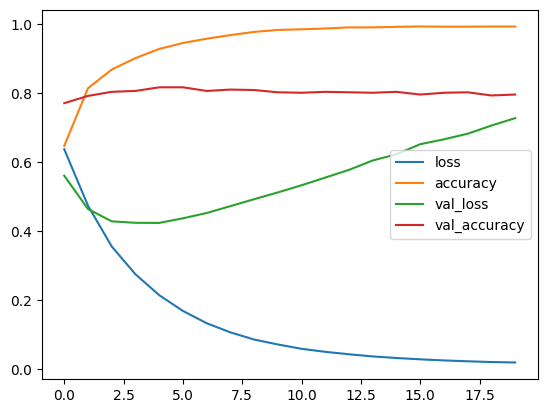

In [47]:
pd.DataFrame(model_1_history.history).plot()

now,lets examine another model to see if increasing the volume of dense layer have any effect

In [48]:
model_2_embedding = tf.keras.layers.Embedding(input_dim=vocab_size,
                                              output_dim=128,
                                              mask_zero=True,
                                              embeddings_initializer="uniform",
                                              name="kir_asb")

In [50]:
input_model_2 = tf.keras.layers.Input(shape=(1,),dtype="string")
x = vectorizer(input_model_2)
x = model_2_embedding(x)
x = tf.keras.layers.GlobalAveragePooling1D()(x)
x = tf.keras.layers.Dense(128,activation=tf.keras.activations.relu)(x)
output_2 = tf.keras.layers.Dense(1,activation=tf.keras.activations.sigmoid)(x)

model_2 = tf.keras.Model(input_model_2,output_2)

In [51]:
model_2.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

In [52]:
model_2_history = model_2.fit(train_sentence,
                              train_labels,
                              epochs=10,
                              validation_data=(val_sentence,val_labels),
                              verbose = 2)

Epoch 1/10
215/215 - 10s - loss: 0.5362 - accuracy: 0.7428 - val_loss: 0.4165 - val_accuracy: 0.8189 - 10s/epoch - 45ms/step
Epoch 2/10
215/215 - 7s - loss: 0.2732 - accuracy: 0.8943 - val_loss: 0.4670 - val_accuracy: 0.8136 - 7s/epoch - 34ms/step
Epoch 3/10
215/215 - 8s - loss: 0.1269 - accuracy: 0.9549 - val_loss: 0.6163 - val_accuracy: 0.8005 - 8s/epoch - 38ms/step
Epoch 4/10
215/215 - 8s - loss: 0.0631 - accuracy: 0.9780 - val_loss: 0.7972 - val_accuracy: 0.7782 - 8s/epoch - 35ms/step
Epoch 5/10
215/215 - 8s - loss: 0.0378 - accuracy: 0.9877 - val_loss: 0.8688 - val_accuracy: 0.7822 - 8s/epoch - 36ms/step
Epoch 6/10
215/215 - 9s - loss: 0.0292 - accuracy: 0.9902 - val_loss: 0.9088 - val_accuracy: 0.7782 - 9s/epoch - 40ms/step
Epoch 7/10
215/215 - 7s - loss: 0.0221 - accuracy: 0.9939 - val_loss: 1.0298 - val_accuracy: 0.7638 - 7s/epoch - 34ms/step
Epoch 8/10
215/215 - 9s - loss: 0.0190 - accuracy: 0.9930 - val_loss: 1.0296 - val_accuracy: 0.7808 - 9s/epoch - 40ms/step
Epoch 9/10
215

<Axes: >

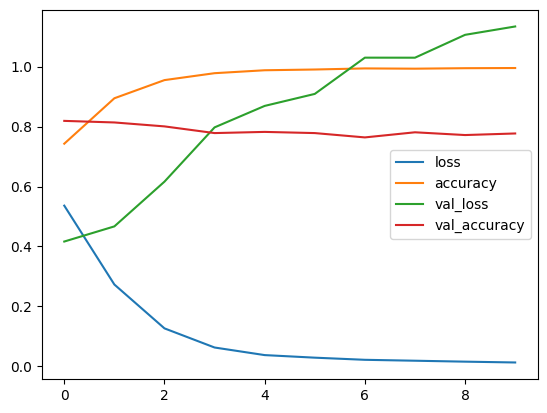

In [54]:
pd.DataFrame(model_2_history.history).plot()

Iknow,it was terrible

lets see if we can imporve if we add another dnse layer

In [55]:
model_3_embedding = tf.keras.layers.Embedding(input_dim=vocab_size,
                                              output_dim=256,
                                              mask_zero=True,
                                              name="kir_ensan")

In [56]:
input_model_3 = tf.keras.layers.Input(shape=(1,),dtype="string")
x = vectorizer(input_model_3)
x = model_3_embedding(x)
x = tf.keras.layers.GlobalAveragePooling1D()(x)
x = tf.keras.layers.Dense(128,activation=tf.keras.activations.relu)(x)
output_3 = tf.keras.layers.Dense(1,activation=tf.keras.activations.sigmoid)(x)

model_3 = tf.keras.Model(input_model_3,output_3)

In [57]:
model_3.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

In [58]:
model_3_history = model_3.fit(train_sentence,
                              train_labels,
                              epochs=10,
                              validation_data=(val_sentence,val_labels),
                              verbose = 2)

Epoch 1/10
215/215 - 16s - loss: 0.5253 - accuracy: 0.7510 - val_loss: 0.4196 - val_accuracy: 0.8163 - 16s/epoch - 77ms/step
Epoch 2/10
215/215 - 14s - loss: 0.2593 - accuracy: 0.8993 - val_loss: 0.4869 - val_accuracy: 0.8123 - 14s/epoch - 67ms/step
Epoch 3/10
215/215 - 14s - loss: 0.1168 - accuracy: 0.9575 - val_loss: 0.6600 - val_accuracy: 0.8005 - 14s/epoch - 64ms/step
Epoch 4/10
215/215 - 14s - loss: 0.0570 - accuracy: 0.9780 - val_loss: 0.8688 - val_accuracy: 0.7756 - 14s/epoch - 67ms/step
Epoch 5/10
215/215 - 14s - loss: 0.0323 - accuracy: 0.9869 - val_loss: 0.9765 - val_accuracy: 0.7835 - 14s/epoch - 64ms/step
Epoch 6/10
215/215 - 14s - loss: 0.0238 - accuracy: 0.9893 - val_loss: 1.0515 - val_accuracy: 0.7808 - 14s/epoch - 63ms/step
Epoch 7/10
215/215 - 14s - loss: 0.0184 - accuracy: 0.9921 - val_loss: 1.1728 - val_accuracy: 0.7743 - 14s/epoch - 64ms/step
Epoch 8/10
215/215 - 14s - loss: 0.0162 - accuracy: 0.9928 - val_loss: 1.1748 - val_accuracy: 0.7808 - 14s/epoch - 65ms/step


<Axes: >

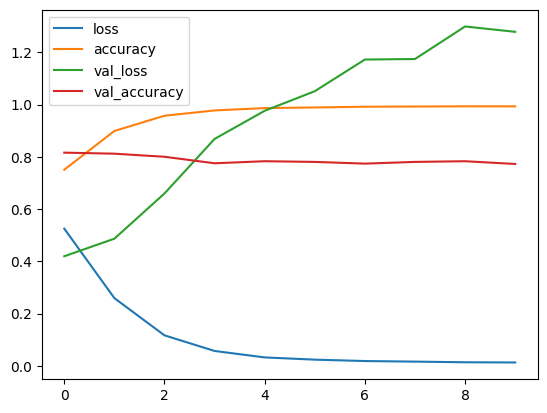

In [59]:
pd.DataFrame(model_3_history.history).plot()

it wasnt good again,

so,lets use our last weapon in dense model

adding another fucking layer :))